In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction/Loan Prediction.csv


In [2]:
df = pd.read_csv('/kaggle/input/loan-prediction/Loan Prediction.csv')

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [6]:
df.shape

(252000, 13)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [12]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [15]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

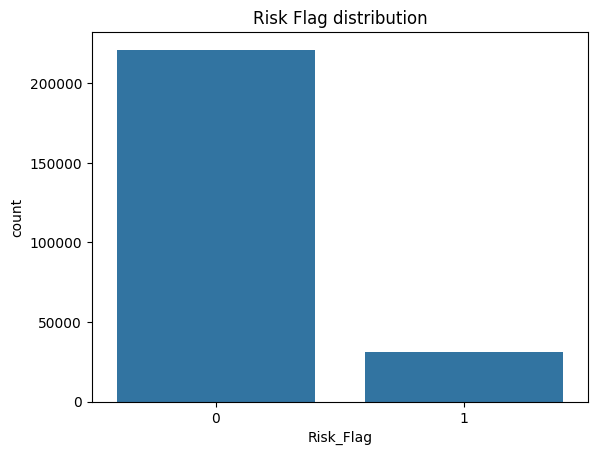

In [18]:
sns.countplot(x='Risk_Flag',data=df)
plt.title('Risk Flag distribution')
plt.show()

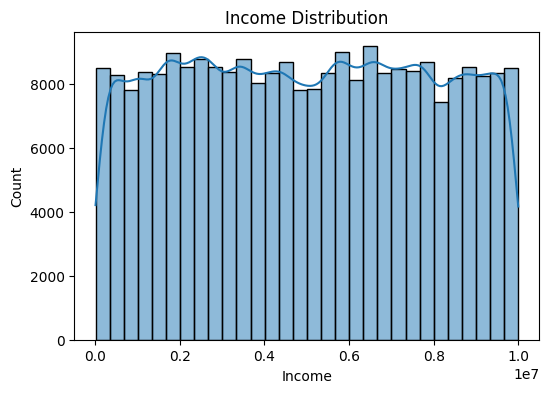

In [19]:
# numerical feature 
plt.figure(figsize = (6,4))
sns.histplot(df['Income'], bins=30, kde = True)
plt.title("Income Distribution")
plt.show()

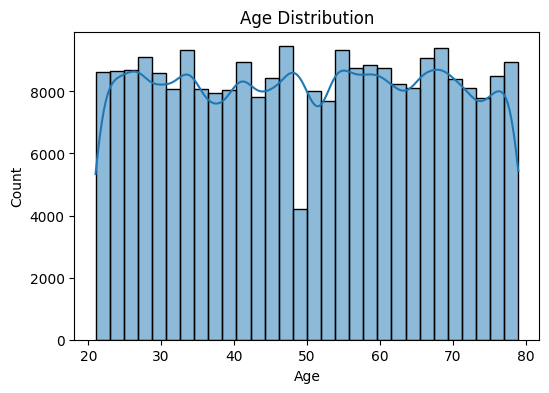

In [20]:
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

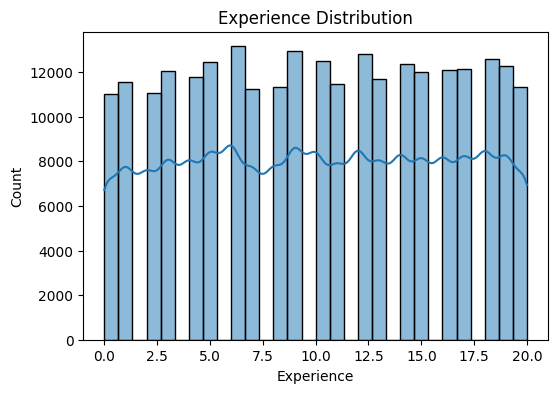

In [21]:
# Experience Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Experience'], bins=30, kde=True)
plt.title("Experience Distribution")
plt.show()

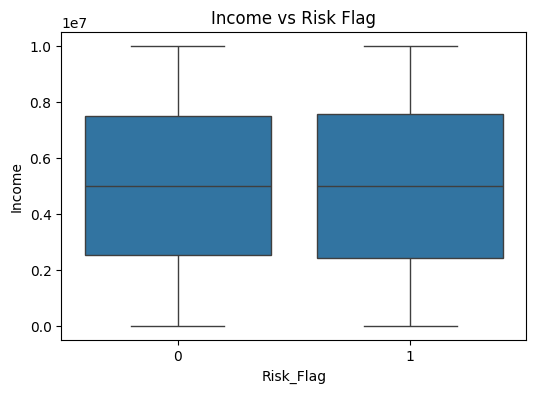

In [22]:
# Income vs Risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Risk_Flag', y='Income', data=df)
plt.title("Income vs Risk Flag")
plt.show()

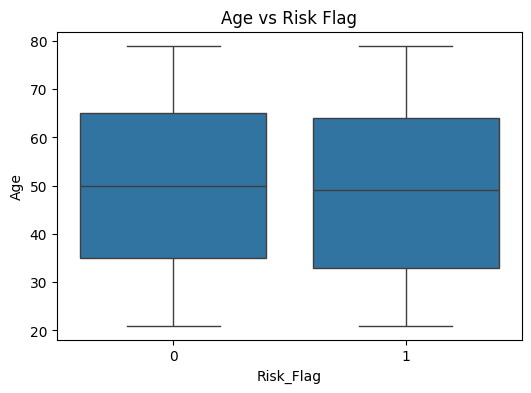

In [24]:
# Age vs Risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Risk_Flag', y='Age', data=df)
plt.title("Age vs Risk Flag")
plt.show()

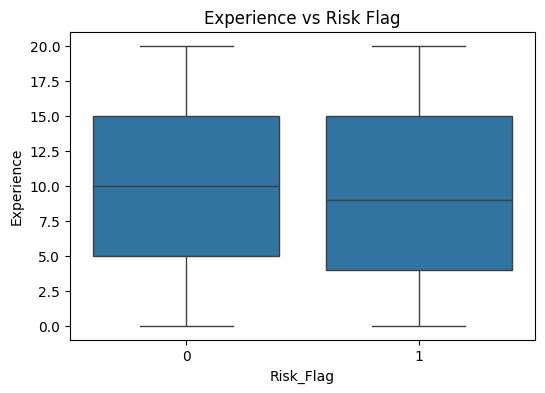

In [25]:
# Experience vs Risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Risk_Flag', y='Experience', data=df)
plt.title("Experience vs Risk Flag")
plt.show()

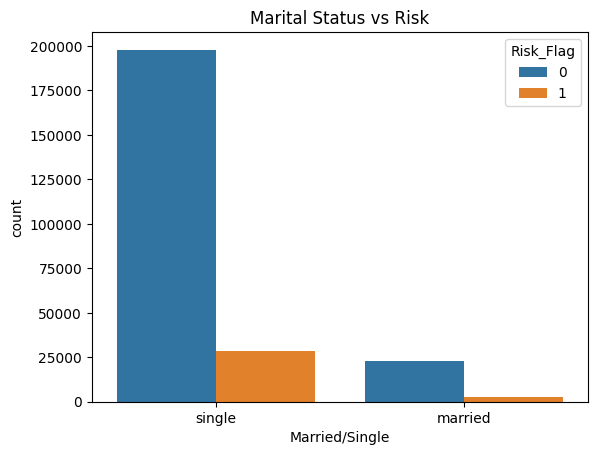

In [26]:
# Categorical Features vs Risk_Flag
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title("Marital Status vs Risk")
plt.show()

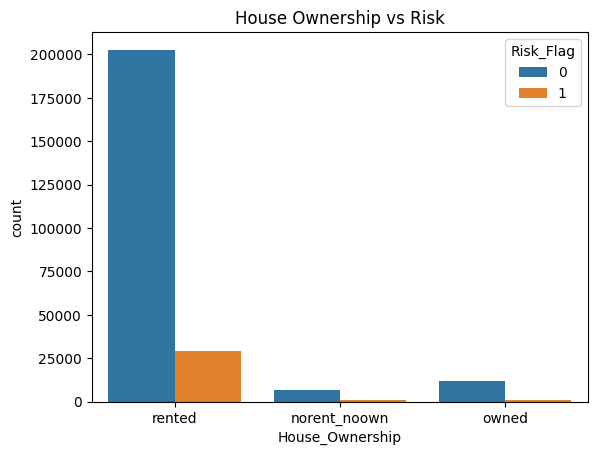

In [27]:
# House Ownership
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)
plt.title("House Ownership vs Risk")
plt.show()

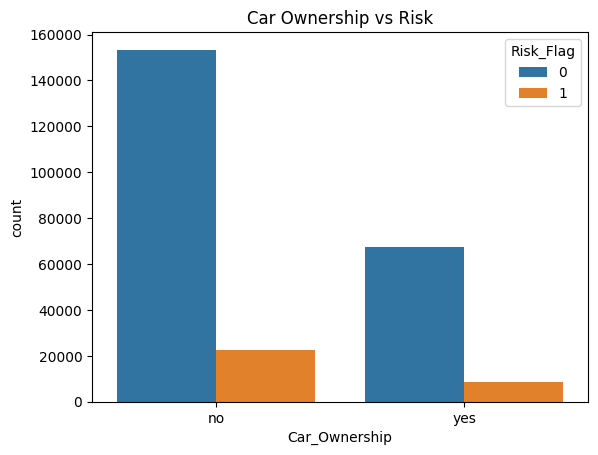

In [28]:
# Car Ownership
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)
plt.title("Car Ownership vs Risk")
plt.show()

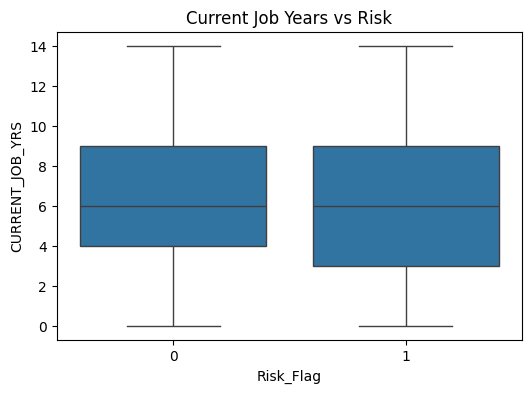

In [30]:
# Job Stability Features
plt.figure(figsize=(6,4))
sns.boxplot(x='Risk_Flag', y='CURRENT_JOB_YRS', data=df)
plt.title("Current Job Years vs Risk")
plt.show()

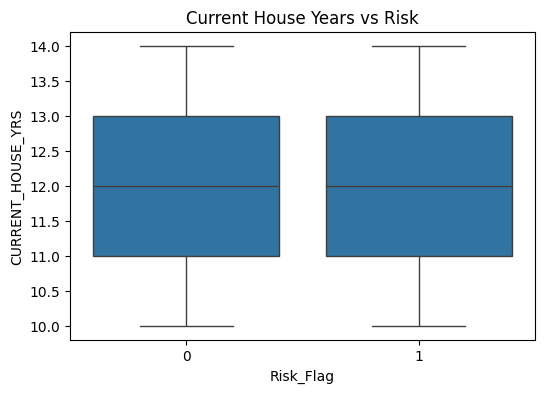

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Risk_Flag', y='CURRENT_HOUSE_YRS', data=df)
plt.title("Current House Years vs Risk")
plt.show()

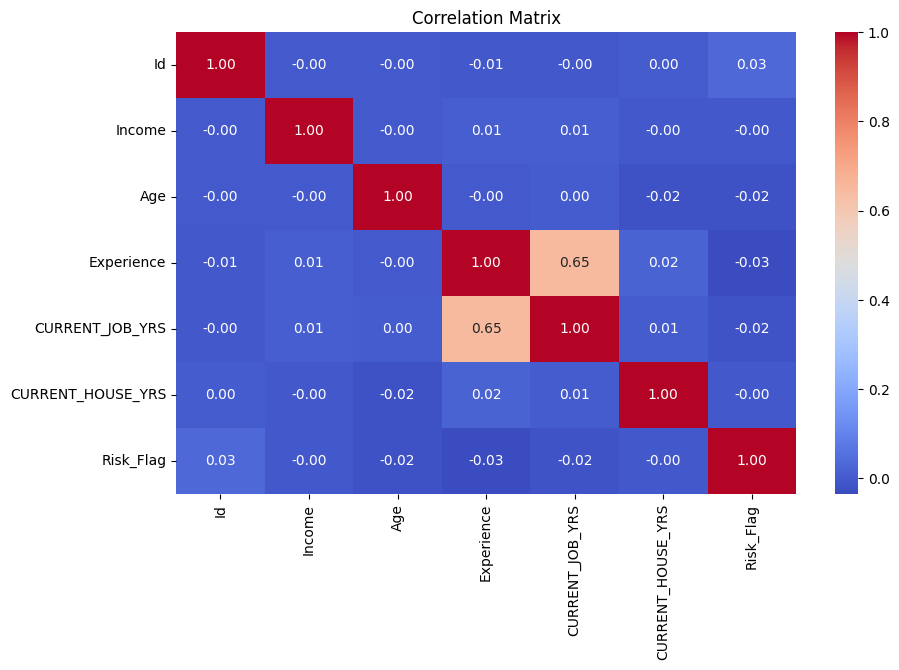

In [32]:
# Correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [33]:
# Data Cleaning – Risk_Flag Dataset
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [34]:
df = df.drop(columns=['Id'])

In [35]:
df = df.drop(columns=['CITY', 'STATE'])

In [36]:
df.duplicated().sum()

np.int64(208810)

In [37]:
df = df.drop_duplicates()

In [38]:
df.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [39]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,4.319000e+04,43190.000000,43190.000000,43190.000000,43190.000000,43190.000000
mean,4.999184e+06,49.917411,9.975041,6.298981,12.006275,0.195485
std,2.883155e+06,17.056702,6.034418,3.663603,1.412652,0.396578
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.508307e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,4.984654e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.494142e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000
